#Data Analysis Process

## Load Data from CSVs

In [120]:
!pip install unicodecsv

In [157]:
import unicodecsv

def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

enrollments = read_csv('/content/enrollments.csv')
daily_engagement = read_csv('/content/daily_engagement.csv')
project_submissions = read_csv('/content/project_submissions.csv')

In [158]:
enrollment_num_rows = len(enrollments)
engagement_num_rows = len(daily_engagement)
submission_num_rows = len(project_submissions)

## Fixing Data Types

In [159]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

OrderedDict([('account_key', '448'),
             ('status', 'canceled'),
             ('join_date', datetime.datetime(2014, 11, 10, 0, 0)),
             ('cancel_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('days_to_cancel', 65),
             ('is_udacity', True),
             ('is_canceled', True)])

In [160]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

OrderedDict([('acct', '0'),
             ('utc_date', datetime.datetime(2015, 1, 9, 0, 0)),
             ('num_courses_visited', 1),
             ('total_minutes_visited', 11.6793745),
             ('lessons_completed', 0),
             ('projects_completed', 0)])

In [161]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

OrderedDict([('creation_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('completion_date', datetime.datetime(2015, 1, 16, 0, 0)),
             ('assigned_rating', 'UNGRADED'),
             ('account_key', '256'),
             ('lesson_key', '3176718735'),
             ('processing_state', 'EVALUATED')])

## Investigating the Data

In [162]:
def unique_id(file,key):
  id = []
  for i in range(len(file)):
    id.append(int(file[i][key]))
  return len(list(set(id)))

In [163]:
enrollment_num_unique_students = unique_id(enrollments,'account_key')
engagement_num_unique_students = unique_id(daily_engagement,'acct')
submission_num_unique_students = unique_id(project_submissions,'account_key')

## Problems in the Data

In [164]:
for i in range(len(daily_engagement)):
  id = daily_engagement[i]['acct']
  del daily_engagement[i]['acct']
  daily_engagement[i]['account_key'] = id

## Missing Engagement Records

In [165]:
def unique_tables(file):
  id = []
  for i in range(len(file)):
    id.append((file[i]['account_key']))
  return list(set(id))

In [166]:
enrollment_unique_tables = unique_tables(enrollments)
engagement_unique_tables = unique_tables(daily_engagement)
submission_unique_tables = unique_tables(project_submissions)

In [167]:
surprising_data_points = list(set(enrollment_unique_tables) - set(engagement_unique_tables))

In [168]:
for i in enrollments:
  if i['account_key'] == surprising_data_points[50]:
    print(i)
    break

OrderedDict([('account_key', '1063'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 7, 14, 0, 0)), ('cancel_date', datetime.datetime(2015, 7, 14, 0, 0)), ('days_to_cancel', 0), ('is_udacity', False), ('is_canceled', True)])


## Checking for More Problem Records

In [169]:
c=0
surprising_id = []
for i in enrollments:
  if i['days_to_cancel'] !=0 and i['account_key'] in surprising_data_points:
    surprising_id.append(i['account_key'])
    c+=1
print(c)

3


In [170]:
for j in surprising_id:
  for i in enrollments:
    if i['account_key'] == j:
      print(i)
    

OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 1, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 3, 10, 0, 0)), ('days_to_cancel', 59), ('is_udacity', True), ('is_canceled', True)])
OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 3, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 6, 17, 0, 0)), ('days_to_cancel', 99), ('is_udacity', True), ('is_canceled', True)])
OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 1, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 3, 10, 0, 0)), ('days_to_cancel', 59), ('is_udacity', True), ('is_canceled', True)])
OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 3, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 6, 17, 0, 0)), ('days_to_cancel', 99), ('is_udacity', True), ('is_canceled', True)])
OrderedDict([('account_key', '1101'), ('

## Tracking Down the Remaining Problems

In [171]:
#Removing test accounts
test_accounts = set()
for enrollment in enrollments:
  if enrollment['is_udacity']:
    test_accounts.add(enrollment['account_key'])
print(len(test_accounts))

6


In [172]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [173]:
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print(len(non_udacity_enrollments))
print(len(non_udacity_engagement))
print(len(non_udacity_submissions))

1622
135656
3634


## Refining the Question

In [175]:
paid_students = {}
for enrollment in non_udacity_enrollments:
  if not enrollment['is_canceled'] or enrollment['days_to_cancel'] > 7:
    acc_key = enrollment['account_key']
    enrol_date = enrollment['join_date']
  
    if acc_key not in paid_students or enrol_date > paid_students[acc_key]:
      paid_students[acc_key] = enrol_date

In [176]:
len(paid_students)

995

## Getting Data from First Week

In [195]:
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days >= 0 and time_delta.days < 7

In [196]:
def remove_free_trials(data):
  new_data = []
  for student in data:
    if student['account_key'] in paid_students:
      new_data.append(student)
  return new_data

paid_enrollments = remove_free_trials(non_udacity_enrollments)
paid_engagement = remove_free_trials(non_udacity_engagement)
paid_submissions = remove_free_trials(non_udacity_submissions)

paid_engagement_in_first_week = []
for data in paid_engagement:
  acc_key = data['account_key']

  if within_one_week(paid_students[acc_key], data['utc_date']):
    paid_engagement_in_first_week.append(data)
   
print(len(paid_engagement_in_first_week))

6919


## Exploring Student Engagement

In [197]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

In [198]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

In [199]:
import numpy as np

# Summarize the data about minutes spent in the classroom
total_minutes = list(total_minutes_by_account.values())
#print(total_minutes)
print('Mean:', np.mean(total_minutes))
print('Standard deviation:', np.std(total_minutes))
print('Minimum:', np.min(total_minutes))
print('Maximum:', np.max(total_minutes))

Mean: 306.70832675342825
Standard deviation: 412.99693340852957
Minimum: 0.0
Maximum: 3564.7332644989997


In [200]:
total_minutes.index(np.max(total_minutes))

162

In [201]:
list(total_minutes_by_account.keys())[162]

'163'

In [202]:
for engagement in paid_engagement_in_first_week:
  if engagement['account_key'] == '163':
    print(engagement)

OrderedDict([('utc_date', datetime.datetime(2015, 7, 9, 0, 0)), ('num_courses_visited', 4), ('total_minutes_visited', 850.519339666), ('lessons_completed', 4), ('projects_completed', 0), ('account_key', '163')])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 10, 0, 0)), ('num_courses_visited', 6), ('total_minutes_visited', 872.633923334), ('lessons_completed', 6), ('projects_completed', 0), ('account_key', '163')])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 11, 0, 0)), ('num_courses_visited', 2), ('total_minutes_visited', 777.018903666), ('lessons_completed', 6), ('projects_completed', 0), ('account_key', '163')])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 12, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 294.568774), ('lessons_completed', 2), ('projects_completed', 0), ('account_key', '163')])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 13, 0, 0)), ('num_courses_visited', 3), ('total_minutes_visited', 471.2139785), ('lessons_completed

## Lessons Completed in First Week

In [203]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

In [205]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
lessons_completed_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_lessons = 0
    for engagement_record in engagement_for_student:
        total_lessons += engagement_record['lessons_completed']
    lessons_completed_by_account[account_key] = total_lessons

In [206]:
import numpy as np

# Summarize the data about minutes spent in the classroom
total_lessons = list(lessons_completed_by_account.values())
#print(total_minutes)
print('Mean:', np.mean(total_lessons))
print('Standard deviation:', np.std(total_lessons))
print('Minimum:', np.min(total_lessons))
print('Maximum:', np.max(total_lessons))

Mean: 1.636180904522613
Standard deviation: 3.002561299829423
Minimum: 0
Maximum: 36


## Number of Visits in First Week

---



In [209]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
total_days = {}
for account_key, engagement_for_student in engagement_by_account.items():
    days = 0
    for engagement_record in engagement_for_student:
        if engagement_record['num_courses_visited']!=0:
          days+=1
    total_days[account_key] = days

In [210]:
import numpy as np

# Summarize the data about minutes spent in the classroom
total_visits = list(total_days.values())
#print(total_minutes)
print('Mean:', np.mean(total_visits))
print('Standard deviation:', np.std(total_visits))
print('Minimum:', np.min(total_visits))
print('Maximum:', np.max(total_visits))

Mean: 2.8673366834170855
Standard deviation: 2.2551980029196814
Minimum: 0
Maximum: 7


##Splitting out passing students

In [217]:
key = set()
for data in paid_submissions:
  if (data['lesson_key'] == '746169184' or data['lesson_key'] == '3176718735') and (data['assigned_rating'] == 'PASSED' or data['assigned_rating'] == 'DISTINCTION'):
    key.add(data['account_key'])
passing_engagement = []
non_passing_engagement = []
for engagement_record in paid_engagement_in_first_week:
  if engagement_record['account_key'] in key:
    passing_engagement.append(engagement_record)
  else:
    non_passing_engagement.append(engagement_record)


In [218]:
print(len(passing_engagement))
print(len(non_passing_engagement))

4527
2392


## Comparing the Two Student Groups

In [221]:
#passing students record
from collections import defaultdict
passed_students_record = defaultdict(list)
for engagement_record in passing_engagement:
    account_key = engagement_record['account_key']
    passed_students_record[account_key].append(engagement_record)

In [222]:
#non passing students record
from collections import defaultdict
non_passed_students_record = defaultdict(list)
for engagement_record in non_passing_engagement:
    account_key = engagement_record['account_key']
    non_passed_students_record[account_key].append(engagement_record)

In [223]:
def metric(data,key):
  total_value = {}
  for account_key, engagement_for_student in data.items():
      total = 0
      for engagement_record in engagement_for_student:
          total += engagement_record[key]
      total_value[account_key] = total
  return total_value

In [231]:
#Minutes spend by passing students
total_value = metric(passed_students_record,'total_minutes_visited')
total_minutes_passed = list(total_value.values())
print('Mean:', np.mean(total_minutes_passed ))
print('Standard deviation:', np.std(total_minutes_passed ))
print('Minimum:', np.min(total_minutes_passed ))
print('Maximum:', np.max(total_minutes_passed ))

Mean: 394.58604648350865
Standard deviation: 448.4995193265521
Minimum: 0.0
Maximum: 3564.7332644989997


In [232]:
#Minutes spend by non passing students
total_value = metric(non_passed_students_record,'total_minutes_visited')
total_minutes_non_passed = list(total_value.values())
print('Mean:', np.mean(total_minutes_non_passed))
print('Standard deviation:', np.std(total_minutes_non_passed))
print('Minimum:', np.min(total_minutes_non_passed))
print('Maximum:', np.max(total_minutes_non_passed))

Mean: 143.32647426675584
Standard deviation: 269.5386190114951
Minimum: 0.0
Maximum: 1768.5227493319999


In [233]:
#Lessons spend by passing students
total_value = metric(passed_students_record,'lessons_completed')
total_lessons_passed = list(total_value.values())
print('Mean:', np.mean(total_lessons_passed))
print('Standard deviation:', np.std(total_lessons_passed))
print('Minimum:', np.min(total_lessons_passed))
print('Maximum:', np.max(total_lessons_passed))

Mean: 2.052550231839258
Standard deviation: 3.1422270555779344
Minimum: 0
Maximum: 36


In [234]:
#Lessons spend by non passing students
total_value = metric(non_passed_students_record,'lessons_completed')
total_lessons_non_passed = list(total_value.values())
print('Mean:', np.mean(total_lessons_non_passed))
print('Standard deviation:', np.std(total_lessons_non_passed))
print('Minimum:', np.min(total_lessons_non_passed))
print('Maximum:', np.max(total_lessons_non_passed))

Mean: 0.8620689655172413
Standard deviation: 2.5491599418312028
Minimum: 0
Maximum: 27


In [235]:
#total visits by passing students
total_days = {}
for account_key, engagement_for_student in passed_students_record.items():
    days = 0
    for engagement_record in engagement_for_student:
        if engagement_record['num_courses_visited']!=0:
          days+=1
    total_days[account_key] = days

total_visits_passed = list(total_days.values())

print('Mean:', np.mean(total_visits_passed))
print('Standard deviation:', np.std(total_visits_passed))
print('Minimum:', np.min(total_visits_passed))
print('Maximum:', np.max(total_visits_passed))

Mean: 3.384853168469861
Standard deviation: 2.2588214709184595
Minimum: 0
Maximum: 7


In [236]:
#total visits by non passing students
total_days = {}
for account_key, engagement_for_student in non_passed_students_record.items():
    days = 0
    for engagement_record in engagement_for_student:
        if engagement_record['num_courses_visited']!=0:
          days+=1
    total_days[account_key] = days

total_visits_non_passed = list(total_days.values())

print('Mean:', np.mean(total_visits_non_passed))
print('Standard deviation:', np.std(total_visits_non_passed))
print('Minimum:', np.min(total_visits_non_passed))
print('Maximum:', np.max(total_visits_non_passed))

Mean: 1.9051724137931034
Standard deviation: 1.9057314413619046
Minimum: 0
Maximum: 7


##Histograms

Text(0.5, 1.0, 'Total visits spend by non passed students')

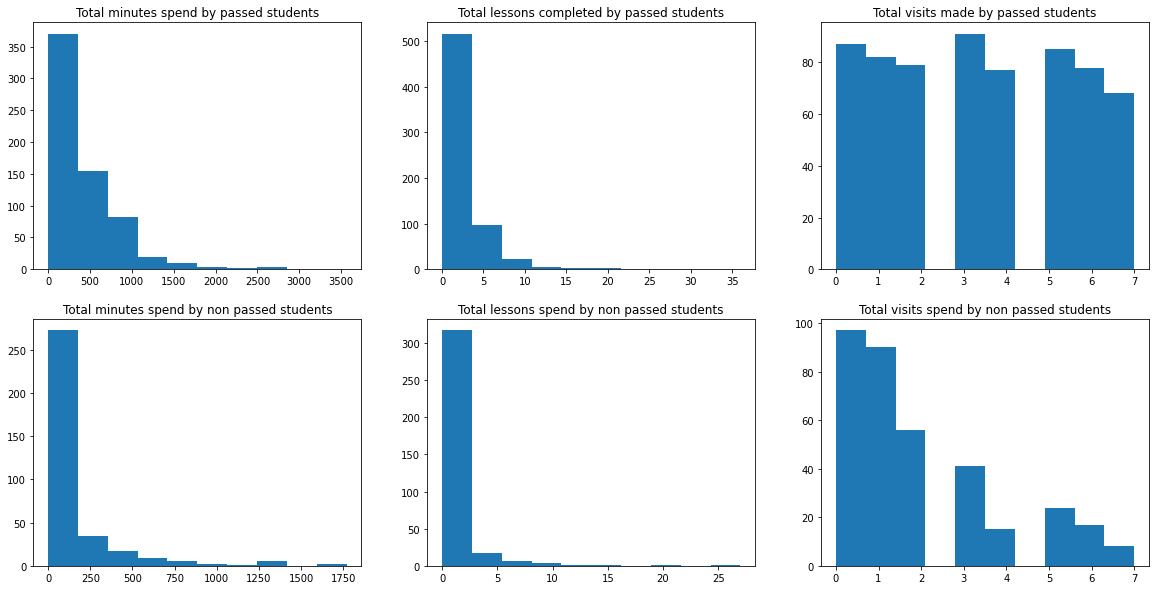

In [240]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,3,figsize=(20,10))

axs[0][0].hist(total_minutes_passed)
axs[0][0].set_title('Total minutes spend by passed students')
axs[0][1].hist(total_lessons_passed)
axs[0][1].set_title('Total lessons completed by passed students')
axs[0][2].hist(total_visits_passed)
axs[0][2].set_title('Total visits made by passed students')

axs[1][0].hist(total_minutes_non_passed)
axs[1][0].set_title('Total minutes spend by non passed students')
axs[1][1].hist(total_lessons_non_passed)
axs[1][1].set_title('Total lessons spend by non passed students')
axs[1][2].hist(total_visits_non_passed)
axs[1][2].set_title('Total visits spend by non passed students')

